In [423]:
import pandas as pd

Dataset has been downloaded from kaggle via anaconda prompt. Data is stored and unizpped to Data/Raw/

Below the data is being read into a dataframe using pandas

In [524]:
taxi_train = pd.read_csv('Data/Raw/train.csv')

In [525]:
taxi_train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


# EDA


Basic statistical summery, min trip duration is 1 and max is 3526282, this are anomolies as a taxi trip doesnt last 1 second or a few weeks.

Passenger count min is 0 meaning there are a few taxi rides that did not include passengers, which makes this data an anomolie.



In [425]:
integer_summary = taxi_train.describe().round().astype(int)
print(integer_summary)


       vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count    1458644          1458644           1458644          1458644   
mean           2                2               -74               41   
std            0                1                 0                0   
min            1                0              -122               34   
25%            1                1               -74               41   
50%            2                1               -74               41   
75%            2                2               -74               41   
max            2                9               -61               52   

       dropoff_longitude  dropoff_latitude  trip_duration  
count            1458644           1458644        1458644  
mean                 -74                41            959  
std                    0                 0           5237  
min                 -122                32              1  
25%                  -74                41         

No null values in the dataset, a good sign, however a lot of data needs to be removed.

In [426]:
taxi_train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

We can identify how many values of passnger count being 0 as shown below

In [427]:
passenger_count_counts = taxi_train['passenger_count'].value_counts()
print(passenger_count_counts)


1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64


Remove all rows that contain 0 for passenger count.

In [428]:
taxi_train = taxi_train[taxi_train['passenger_count'] != 0]

print(taxi_train['passenger_count'].unique())
passenger_count_counts = taxi_train['passenger_count'].value_counts()
print(passenger_count_counts)

[1 6 4 2 3 5 7 9 8]
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
7          3
9          1
8          1
Name: passenger_count, dtype: int64


We can drop a few columns that we do not need to reduce dimentiality

In [429]:
taxi_train = taxi_train.drop(['passenger_count','id'], axis=1)

To address the anonomlys in trip_duration, we can plot a log a scatter plot to see where the anomolies are.

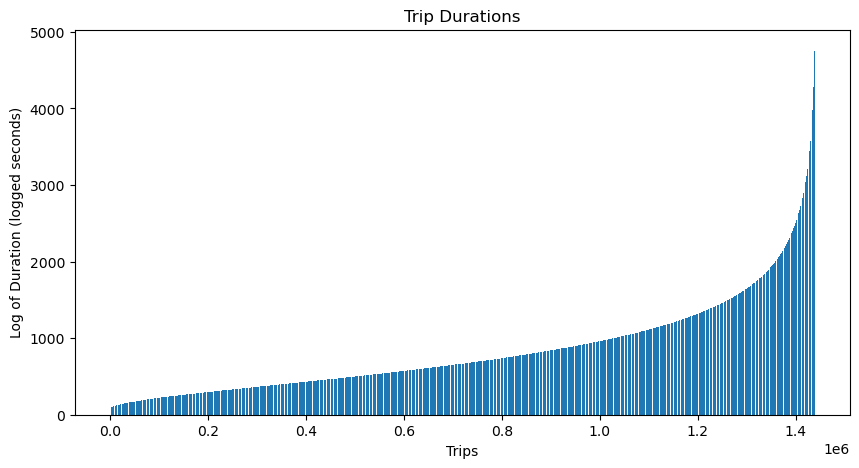

In [517]:
import matplotlib.pyplot as plt
import numpy as np

trip_durations = taxi_train['trip_duration'].sort_values()

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(range(len(trip_durations)),(trip_durations))
ax.set_title('Trip Durations')
ax.set_xlabel('Trips')
ax.set_ylabel('Log of Duration (logged seconds)')

# Display the plot
plt.show()


We can visualise the outliers more effectively using a botplot

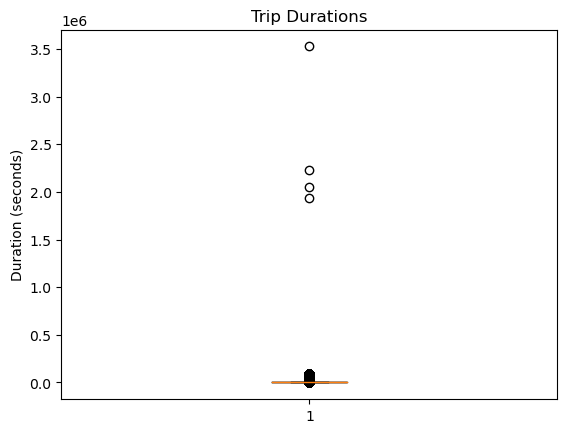

In [431]:
import matplotlib.pyplot as plt

plt.boxplot(taxi_train['trip_duration'])

plt.title('Trip Durations')
plt.ylabel('Duration (seconds)')

plt.show()


Clearly the outliers are shown.

We can further log scale the data to see the range of the data more effectivley.

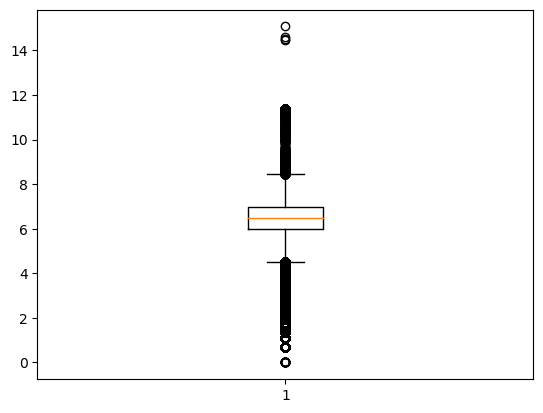

In [432]:
import matplotlib.pyplot as plt
import pandas as pd
import math
taxi_train['trip_duration_log'] = taxi_train['trip_duration'].apply(lambda x: math.log(x))
plt.boxplot(taxi_train['trip_duration_log'])
plt.show()


(1438881, 10)


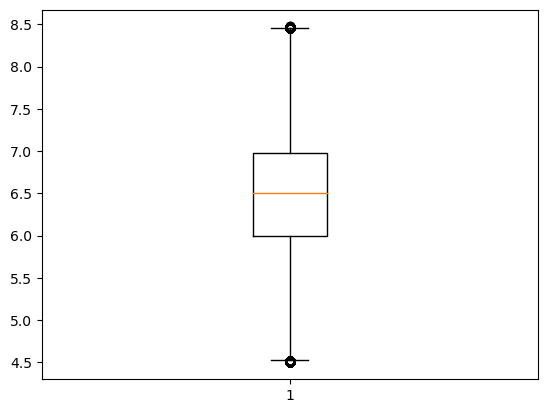

In [433]:
import matplotlib.pyplot as plt
import pandas as pd
import math
q1, q3 = taxi_train['trip_duration_log'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
taxi_train = taxi_train[(taxi_train['trip_duration_log'] >= lower_bound) & (taxi_train['trip_duration_log'] <= upper_bound)]
print(taxi_train.shape)
plt.boxplot(taxi_train['trip_duration_log'])
plt.show()

In [434]:
integer_summary = taxi_train.describe().round().astype(int)
print(integer_summary)
#taxi_train = taxi_train.drop('trip_duration_log', axis=1)

       vendor_id  pickup_longitude  pickup_latitude  dropoff_longitude  \
count    1438881           1438881          1438881            1438881   
mean           2               -74               41                -74   
std            0                 0                0                  0   
min            1              -122               34               -122   
25%            1               -74               41                -74   
50%            2               -74               41                -74   
75%            2               -74               41                -74   
max            2               -61               52                -61   

       dropoff_latitude  trip_duration  trip_duration_log  
count           1438881        1438881            1438881  
mean                 41            838                  6  
std                   0            630                  1  
min                  32             90                  4  
25%                  41          

In [435]:
taxi_train.shape[0]

1438881

In [436]:
import math

def distance(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)
    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad
    a = math.sin(delta_lat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(delta_lon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c
    return d


In [437]:
taxi_train['distance'] = taxi_train.apply(lambda x: distance(x['pickup_latitude'], x['pickup_longitude'], x['dropoff_latitude'], x['dropoff_longitude']), axis=1)

In [438]:
#taxi_train = taxi_train.drop(['pickup_latitude', 'pickup_longitude','dropoff_latitude','dropoff_longitude'], axis=1)

Split pickup_datetime and dropoff_datetime into day and time

In [439]:
taxi_train[['pickup_date', 'pickup_time']] = taxi_train['pickup_datetime'].str.split(' ', expand=True)

taxi_train['pickup_date'] = pd.to_datetime(taxi_train['pickup_date']).dt.date
taxi_train['pickup_time'] = pd.to_datetime(taxi_train['pickup_time']).dt.time

taxi_train[['dropoff_date', 'dropoff_time']] = taxi_train['dropoff_datetime'].str.split(' ', expand=True)

taxi_train['dropoff_date'] = pd.to_datetime(taxi_train['dropoff_date']).dt.date
taxi_train['dropoff_time'] = pd.to_datetime(taxi_train['dropoff_time']).dt.time

In [440]:
#taxi_train = taxi_train.drop(['pickup_datetime', 'dropoff_datetime'], axis=1)

Convert the dropoff Date and pickup Date into the respective day

In [441]:
import calendar
from datetime import date
taxi_train['dropoff_day'] = pd.to_datetime(taxi_train['dropoff_date']).apply(lambda x: calendar.day_name[x.weekday()])
taxi_train['pickup_day'] = pd.to_datetime(taxi_train['pickup_date']).apply(lambda x: calendar.day_name[x.weekday()])
taxi_train['pickup_month'] = pd.to_datetime(taxi_train['pickup_date']).dt.month.apply(lambda x: calendar.month_name[x])
taxi_train['dropoff_month'] = pd.to_datetime(taxi_train['pickup_date']).dt.month.apply(lambda x: calendar.month_name[x])
#taxi_train = taxi_train.drop(['dropoff_date', 'pickup_date'], axis=1)

In [442]:
taxi_train
taxi_train["pickup_month"].unique()

array(['March', 'June', 'January', 'April', 'May', 'February'],
      dtype=object)

Convert the time into corrisponding part of the day, using a custom built function with information based off xy to give the respective parts of the day for new york city.

In [443]:
def get_section_of_day(param_time):
    '''This function is used to convert time in the format "hour:minute:second" into the part of the day, eg Morning or afternoon
    The function uses https://www.britannica.com/dictionary/eb/qa/parts-of-the-day-early-morning-late-morning-etc as a standared
    measure for the allocation of the part of the day'''
    hour = param_time.hour
    if hour >= 5 and hour <= 8:
        #return 'Early morning'
        return 1
    elif hour >= 8 and hour <= 12:
        #return 'Late morning'
        return 2
    elif hour >= 12 and hour <= 15:
        #return 'Early afternoon'
        return 3
    elif hour >= 15 and hour <= 16:
        #return 'Afternoon'
        return 4
    elif hour >= 16 and hour <= 17:
        #return 'Late afternoon'
        return 5
    elif hour >= 17 and hour <= 19:
        #return 'Early evening'
        return 6
    elif hour >= 19 and hour <= 21:
        #return 'late evening'
        return 7
    elif hour >= 21 or hour < 5:
        #return 'Night'
        return 8
    
taxi_train['pickup_day_section'] = taxi_train['pickup_time'].apply(get_section_of_day)
taxi_train['dropoff_day_section'] = taxi_train['dropoff_time'].apply(get_section_of_day)
taxi_train

,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_log,...,pickup_date,pickup_time,dropoff_date,dropoff_time,dropoff_day,pickup_day,pickup_month,dropoff_month,pickup_day_section,dropoff_day_section
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,-73.982155,40.767937,-73.964630,40.765602,N,455,6.120297,...,2016-03-14,17:24:55,2016-03-14,17:32:30,Monday,Monday,March,March,5,5
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,-73.980415,40.738564,-73.999481,40.731152,N,663,6.496775,...,2016-06-12,00:43:35,2016-06-12,00:54:38,Sunday,Sunday,June,June,8,8
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661056,...,2016-01-19,11:35:24,2016-01-19,12:10:48,Tuesday,Tuesday,January,January,2,2
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,-74.010040,40.719971,-74.012268,40.706718,N,429,6.061457,...,2016-04-06,19:32:31,2016-04-06,19:39:40,Wednesday,Wednesday,April,April,6,6
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,-73.973053,40.793209,-73.972923,40.782520,N,435,6.075346,...,2016-03-26,13:30:55,2016-03-26,13:38:10,Saturday,Saturday,March,March,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,2016-04-08 13:31:04,2016-04-08 13:44:02,-73.982201,40.745522,-73.994911,40.740170,N,778,6.656727,...,2016-04-08,13:31:04,2016-04-08,13:44:02,Friday,Friday,April,April,3,3
1458640,1,2016-01-10 07:35:15,2016-01-10 07:46:10,-74.000946,40.747379,-73.970184,40.796547,N,655,6.484635,...,2016-01-10,07:35:15,2016-01-10,07:46:10,Sunday,Sunday,January,January,1,1
1458641,2,2016-04-22 06:57:41,2016-04-22 07:10:25,-73.959129,40.768799,-74.004433,40.707371,N,764,6.638568,...,2016-04-22,06:57:41,2016-04-22,07:10:25,Friday,Friday,April,April,1,1
1458642,1,2016-01-05 15:56:26,2016-01-05 16:02:39,-73.982079,40.749062,-73.974632,40.757107,N,373,5.921578,...,2016-01-05,15:56:26,2016-01-05,16:02:39,Tuesday,Tuesday,January,January,3,4


Rush hour time
https://jknylaw.com/blog/worst-traffic-times-in-new-york-city/#:~:text=The%20Worst%20Time,7%20p.m.
8-9 a.m. and 3-7 p.m.

In [444]:
def get_rush_hour(param_time):
    hour = param_time.hour
    if hour >=8 and hour <= 9:
        #return 'Morning rush hour'
        return 1
    elif hour >= 13 and hour <= 19:
        #return 'Afternoon rush hour'
        return 2
    else:
        return 3
        #return 'No rush hour'

In [445]:
taxi_train['pickup_rush_hour'] = taxi_train['pickup_time'].apply(get_rush_hour)
taxi_train['dropoff_rush_hour'] = taxi_train['dropoff_time'].apply(get_rush_hour)

In [446]:
#taxi_train= taxi_train.drop(['pickup_time','dropoff_time'],axis=1)

In [447]:
taxi_train

,vendor_id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_log,...,dropoff_date,dropoff_time,dropoff_day,pickup_day,pickup_month,dropoff_month,pickup_day_section,dropoff_day_section,pickup_rush_hour,dropoff_rush_hour
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,-73.982155,40.767937,-73.964630,40.765602,N,455,6.120297,...,2016-03-14,17:32:30,Monday,Monday,March,March,5,5,2,2
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,-73.980415,40.738564,-73.999481,40.731152,N,663,6.496775,...,2016-06-12,00:54:38,Sunday,Sunday,June,June,8,8,3,3
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661056,...,2016-01-19,12:10:48,Tuesday,Tuesday,January,January,2,2,3,3
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,-74.010040,40.719971,-74.012268,40.706718,N,429,6.061457,...,2016-04-06,19:39:40,Wednesday,Wednesday,April,April,6,6,2,2
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,-73.973053,40.793209,-73.972923,40.782520,N,435,6.075346,...,2016-03-26,13:38:10,Saturday,Saturday,March,March,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,2016-04-08 13:31:04,2016-04-08 13:44:02,-73.982201,40.745522,-73.994911,40.740170,N,778,6.656727,...,2016-04-08,13:44:02,Friday,Friday,April,April,3,3,2,2
1458640,1,2016-01-10 07:35:15,2016-01-10 07:46:10,-74.000946,40.747379,-73.970184,40.796547,N,655,6.484635,...,2016-01-10,07:46:10,Sunday,Sunday,January,January,1,1,3,3
1458641,2,2016-04-22 06:57:41,2016-04-22 07:10:25,-73.959129,40.768799,-74.004433,40.707371,N,764,6.638568,...,2016-04-22,07:10:25,Friday,Friday,April,April,1,1,3,3
1458642,1,2016-01-05 15:56:26,2016-01-05 16:02:39,-73.982079,40.749062,-73.974632,40.757107,N,373,5.921578,...,2016-01-05,16:02:39,Tuesday,Tuesday,January,January,3,4,2,2


In [478]:
df = taxi_train.copy()

def convert_weekday_to_integer(param_weekdayName):
    week_days = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
    return week_days.index(param_weekdayName.lower()) +1
#df =df.drop('store_and_fwd_flag',axis=1)
df['pickup_day'] = df['pickup_day'].apply(convert_weekday_to_integer)
df['dropoff_day'] = df['dropoff_day'].apply(convert_weekday_to_integer)
def convert_month_to_integer(param_monthName):
    months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
    return months.index(param_monthName.lower()) + 1
df['pickup_month'] = df['pickup_month'].apply(convert_month_to_integer)
df['dropoff_month'] = df['dropoff_month'].apply(convert_month_to_integer)


df = df[df['distance'] >= 0.25]
df['avg_speed'] = df['distance'] / (df['trip_duration'] / 3600)
df = df[df['trip_duration'] >= 200]
df = df[df['avg_speed'] <= 40]
df = df[df['avg_speed'] >= 6]
df = df.drop('avg_speed',axis=1)

import numpy as np

# Convert pickup_day and dropoff_day to cosine and sine values
df['pickup_day_cos'] = np.cos(2 * np.pi * df['pickup_day'] / 7)
df['pickup_day_sin'] = np.sin(2 * np.pi * df['pickup_day'] / 7)


# Convert pickup_month and dropoff_month to cosine and sine values
df['pickup_month_cos'] = np.cos(2 * np.pi * df['pickup_month'] / 12)
df['pickup_month_sin'] = np.sin(2 * np.pi * df['pickup_month'] / 12)


# Convert pickup_day_section and dropoff_day_section to cosine and sine values
df['pickup_day_section_cos'] = np.cos(2 * np.pi * df['pickup_day_section'] / 8)
df['pickup_day_section_sin'] = np.sin(2 * np.pi * df['pickup_day_section'] / 8)


# Convert pickup_rush_hour and dropoff_rush_hour to cosine and sine values
df['pickup_rush_hour_cos'] = np.cos(2 * np.pi * df['pickup_rush_hour'] / 3)
df['pickup_rush_hour_sin'] = np.sin(2 * np.pi * df['pickup_rush_hour'] / 3)
#df = df.drop(['pickup_day', 'pickup_month',  'pickup_day_section', 'pickup_rush_hour', ], axis=1)
df['trip_duration'] = np.log(df['trip_duration'])
df['distance'] = np.log(df['distance'])

df = df.drop(['pickup_datetime','dropoff_datetime','pickup_longitude','pickup_latitude','store_and_fwd_flag','dropoff_longitude','dropoff_latitude','pickup_date','dropoff_date','dropoff_time','pickup_time','trip_duration_log','dropoff_day','dropoff_month','dropoff_day_section','dropoff_rush_hour'],axis=1)
df = df.drop(['pickup_day_cos','pickup_day_sin','pickup_month_cos','pickup_month_sin','pickup_day_section_cos','pickup_day_section_sin','pickup_rush_hour_cos','pickup_rush_hour_sin'
],axis=1)
#df = df.drop(['pickup_day','pickup_month','pickup_day_section','pickup_rush_hour'])
df.to_csv("Data/Pre_Processed/processed_data.csv", index=False)

df

,vendor_id,trip_duration,distance,pickup_day,pickup_month,pickup_day_section,pickup_rush_hour
0,2,6.120297,0.404478,1,3,5,2
1,1,6.496775,0.590842,7,6,8,3
2,2,7.661056,1.853967,2,1,2,3
3,2,6.061457,0.395750,3,4,6,2
4,2,6.075346,0.172766,6,3,3,2
...,...,...,...,...,...,...,...
1458637,1,6.633318,1.263436,7,4,6,2
1458638,2,6.025866,0.840467,2,2,8,3
1458640,1,6.484635,1.800031,7,1,1,3
1458641,2,6.638568,2.057273,5,4,1,3


only retain distances greater than 0.25
only retain trip_durations over 200
ony retain trip that the speed is below 40
only retain trip that the speed is above 4

Log scale distance and time

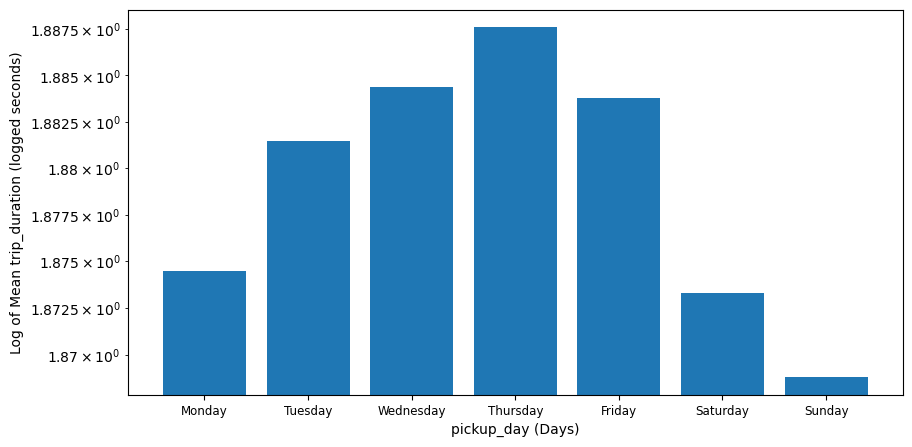

In [513]:
import matplotlib.pyplot as plt
import numpy as np
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pickup_day_duration = df.groupby('pickup_day')['trip_duration'].mean()
pickup_day_duration_log = np.log(pickup_day_duration)
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(pickup_day_duration_log)), pickup_day_duration_log.values)
ax.set_xticks(range(len(day_names)))
ax.set_xticklabels(day_names, fontsize=8.5)
ax.set_xlabel('pickup_day (Days)')
ax.set_ylabel('Log of Mean trip_duration (logged seconds)')
ax.set_yscale('log')
plt.show()


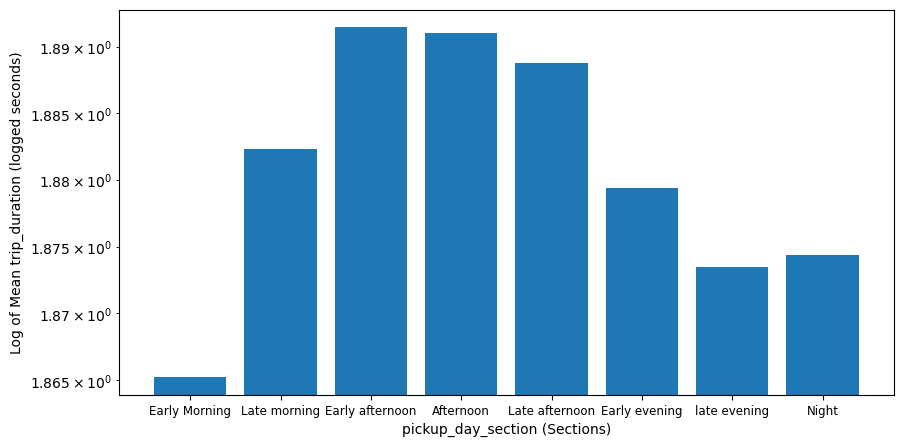

In [514]:
day_names = ['Early Morning', 'Late morning', 'Early afternoon','Afternoon', 'Late afternoon', 'Early evening','late evening','Night']
mean_trip_duration = df.groupby('pickup_day_section')['trip_duration'].mean()
pickup_month_duration_log = np.log(mean_trip_duration)
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(pickup_month_duration_log)), pickup_month_duration_log.values)
ax.set_xticks(range(len(day_names)))
ax.set_xticklabels(day_names, fontsize=8.5)
ax.set_xlabel('pickup_day_section (Sections)')
ax.set_ylabel('Log of Mean trip_duration (logged seconds)')
ax.set_yscale('log')
plt.show()

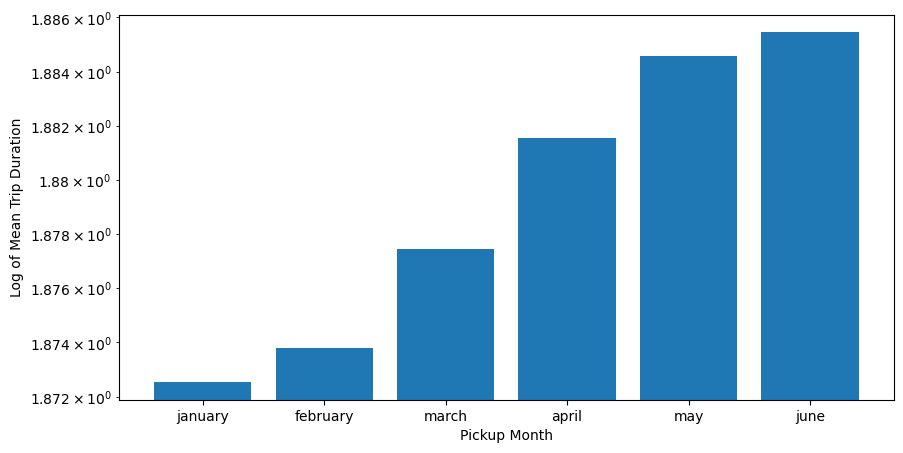

In [495]:
import matplotlib.pyplot as plt
import numpy as np
import calendar
from datetime import date

# Create a list of the month names

# Convert the pickup_month column to month name
month_names = ['january', 'february', 'march', 'april', 'may', 'june']
    
# Calculate the mean trip duration for each pickup month
pickup_month_duration = df.groupby('pickup_month')['trip_duration'].mean()

# Take the log of the mean trip duration
pickup_month_duration_log = np.log(pickup_month_duration)

# Create a bar plot for pickup month with log scale for y-axis
fig, ax = plt.subplots(figsize=(10, 5))
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
ax.bar(range(len(pickup_month_duration_log)), pickup_month_duration_log.values)
ax.set_xticks(range(len(month_names)))
ax.set_xticklabels(month_names)
ax.set_xlabel('Pickup Month')
ax.set_ylabel('Log of Mean Trip Duration')
ax.set_yscale('log')
plt.show()


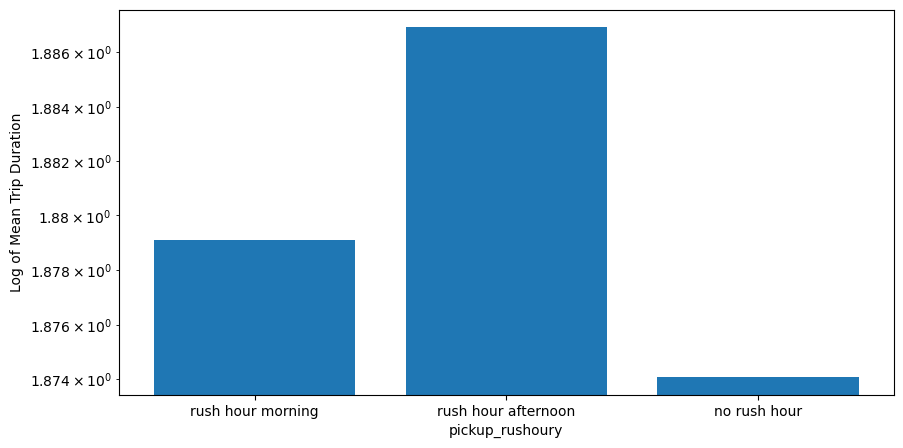

In [476]:
import matplotlib.pyplot as plt
import numpy as np

# Create a list of the day names
day_names = ['rush hour morning','rush hour afternoon','no rush hour']

# Calculate the mean trip duration for each pickup day
pickup_day_duration = df.groupby('pickup_rush_hour')['trip_duration'].mean()

# Take the log of the mean trip duration
pickup_day_duration_log = np.log(pickup_day_duration)

# Create a bar plot for pickup day with log scale for y-axis
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(range(len(pickup_day_duration_log)), pickup_day_duration_log.values)
ax.set_xticks(range(len(day_names)))
ax.set_xticklabels(day_names)
ax.set_xlabel('pickup_rushoury')
ax.set_ylabel('Log of Mean Trip Duration')
ax.set_yscale('log')
plt.show()


In [454]:
#df = df.drop(['pickup_day_cos','pickup_day_sin','pickup_month_cos','pickup_month_sin','pickup_day_section_cos','pickup_day_section_sin','pickup_rush_hour_cos','pickup_rush_hour_sin'
#],axis=1)
df

,vendor_id,trip_duration,distance,pickup_day,pickup_month,pickup_day_section,pickup_rush_hour
0,2,6.120297,0.404478,1,3,5,2
1,1,6.496775,0.590842,7,6,8,3
2,2,7.661056,1.853967,2,1,2,3
3,2,6.061457,0.395750,3,4,6,2
4,2,6.075346,0.172766,6,3,3,2
...,...,...,...,...,...,...,...
1458637,1,6.633318,1.263436,7,4,6,2
1458638,2,6.025866,0.840467,2,2,8,3
1458640,1,6.484635,1.800031,7,1,1,3
1458641,2,6.638568,2.057273,5,4,1,3


In [461]:
df

,vendor_id,trip_duration,distance,pickup_day_cos,pickup_day_sin,pickup_month_cos,pickup_month_sin,pickup_day_section_cos,pickup_day_section_sin,pickup_rush_hour_cos,pickup_rush_hour_sin
0,2,6.120297,0.404478,0.623490,7.818315e-01,6.123234e-17,1.000000e+00,-7.071068e-01,-7.071068e-01,-0.5,-8.660254e-01
1,1,6.496775,0.590842,1.000000,-2.449294e-16,-1.000000e+00,1.224647e-16,1.000000e+00,-2.449294e-16,1.0,-2.449294e-16
2,2,7.661056,1.853967,-0.222521,9.749279e-01,8.660254e-01,5.000000e-01,6.123234e-17,1.000000e+00,1.0,-2.449294e-16
3,2,6.061457,0.395750,-0.900969,4.338837e-01,-5.000000e-01,8.660254e-01,-1.836970e-16,-1.000000e+00,-0.5,-8.660254e-01
4,2,6.075346,0.172766,0.623490,-7.818315e-01,6.123234e-17,1.000000e+00,-7.071068e-01,7.071068e-01,-0.5,-8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...
1458637,1,6.633318,1.263436,1.000000,-2.449294e-16,-5.000000e-01,8.660254e-01,-1.836970e-16,-1.000000e+00,-0.5,-8.660254e-01
1458638,2,6.025866,0.840467,-0.222521,9.749279e-01,5.000000e-01,8.660254e-01,1.000000e+00,-2.449294e-16,1.0,-2.449294e-16
1458640,1,6.484635,1.800031,1.000000,-2.449294e-16,8.660254e-01,5.000000e-01,7.071068e-01,7.071068e-01,1.0,-2.449294e-16
1458641,2,6.638568,2.057273,-0.222521,-9.749279e-01,-5.000000e-01,8.660254e-01,7.071068e-01,7.071068e-01,1.0,-2.449294e-16


In [486]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(df.drop(['trip_duration'], axis=1), df['trip_duration'], test_size=0.3, random_state=42)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Squared Error: 0.09285868207296308
R-squared score: 0.7748166735174706


In [ ]:
Mean Squared Error: 0.0927126765248727
R-squared score: 0.7745605694922525

Mean Squared Error: 0.09161700709860866
R-squared score: 0.7778277490022114

Mean Squared Error: 0.09163409768086703
R-squared score: 0.7777863041520525

In [ ]:
Mean Squared Error: 0.09287630746156333
R-squared score: 0.774773931756044

In [ ]:
Mean Squared Error: 0.09163409768086703
R-squared score: 0.7777863041520525

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

In [ ]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE
print('RMSE:', rmse)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_log_error

rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

# Print the RMSLE
print("RMSLE:", rmsle)

In [340]:
df

,vendor_id,trip_duration,distance,pickup_day_cos,pickup_day_sin,pickup_month_cos,pickup_month_sin,pickup_day_section_cos,pickup_day_section_sin,pickup_rush_hour_cos,pickup_rush_hour_sin
0,2,455,1.498521,0.623490,7.818315e-01,6.123234e-17,1.000000e+00,-7.071068e-01,-7.071068e-01,-0.5,-8.660254e-01
1,1,663,1.805507,1.000000,-2.449294e-16,-1.000000e+00,1.224647e-16,1.000000e+00,-2.449294e-16,1.0,-2.449294e-16
2,2,2124,6.385098,-0.222521,9.749279e-01,8.660254e-01,5.000000e-01,6.123234e-17,1.000000e+00,1.0,-2.449294e-16
3,2,429,1.485498,-0.900969,4.338837e-01,-5.000000e-01,8.660254e-01,-1.836970e-16,-1.000000e+00,-0.5,-8.660254e-01
4,2,435,1.188588,0.623490,-7.818315e-01,6.123234e-17,1.000000e+00,-7.071068e-01,7.071068e-01,-0.5,-8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...
1458637,1,760,3.537555,1.000000,-2.449294e-16,-5.000000e-01,8.660254e-01,-1.836970e-16,-1.000000e+00,-0.5,-8.660254e-01
1458638,2,414,2.317448,-0.222521,9.749279e-01,5.000000e-01,8.660254e-01,1.000000e+00,-2.449294e-16,1.0,-2.449294e-16
1458640,1,655,6.049836,1.000000,-2.449294e-16,8.660254e-01,5.000000e-01,7.071068e-01,7.071068e-01,1.0,-2.449294e-16
1458641,2,764,7.824606,-0.222521,-9.749279e-01,-5.000000e-01,8.660254e-01,7.071068e-01,7.071068e-01,1.0,-2.449294e-16


In [ ]:
# Plot true vs predicted values
plt.scatter(y_test, y_pred, alpha=0.1)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [345]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the data into training and testing sets
# Convert multiple columns from string to integer data type

# Convert multiple columns from string to numeric data type, excluding non-numeric values

X_train, X_test, y_train, y_test = train_test_split(df.drop(['trip_duration'], axis=1), df['trip_duration'], test_size=0.3, random_state=42)

# Create a random forest regression model
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Perform 10-fold cross-validation on the model
mse_scores = -cross_val_score(rf, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='r2')

# Calculate the mean and standard deviation of the mean squared error scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

# Calculate the mean and standard deviation of the R-squared scores
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

# Print the mean and standard deviation of the mean squared error and R-squared scores
print('Mean Squared Error:', mean_mse)
print('Standard deviation of Mean Squared Error:', std_mse)
print('Mean R-squared score:', mean_r2)
print('Standard deviation of R-squared score:', std_r2)


KeyboardInterrupt: 

In [ ]:
# Plot true vs predicted values
plt.scatter(y_test, y_pred, alpha=0.1)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

C:\Users\Alexp\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


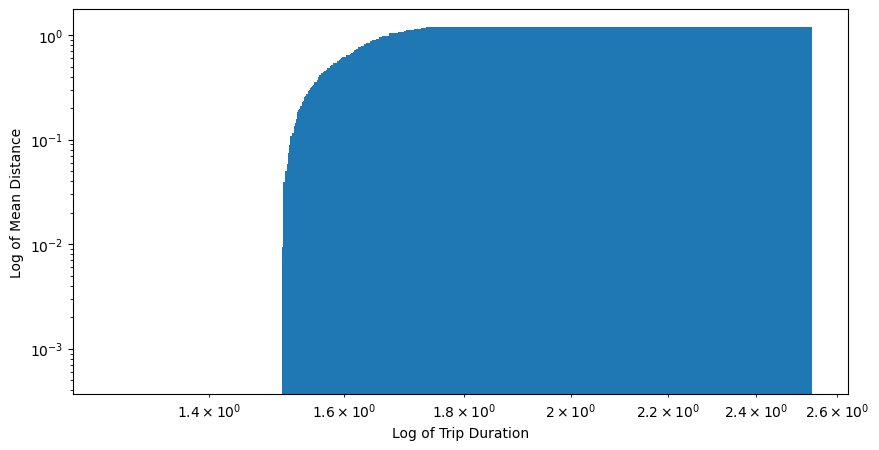

In [526]:
import matplotlib.pyplot as plt
import numpy as np

# Take the log of the distance and trip duration
df['log_distance'] = np.log(df['distance'])
df['log_duration'] = np.log(df['trip_duration'])

# Calculate the mean log distance for each log trip duration
log_duration_log_distance = df.groupby('log_duration')['log_distance'].mean()

# Create a bar plot for log trip duration with log scale for x and y-axis
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(log_duration_log_distance.index, log_duration_log_distance.values)
ax.set_xlabel('Log of Trip Duration')
ax.set_ylabel('Log of Mean Distance')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()


C:\Users\Alexp\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


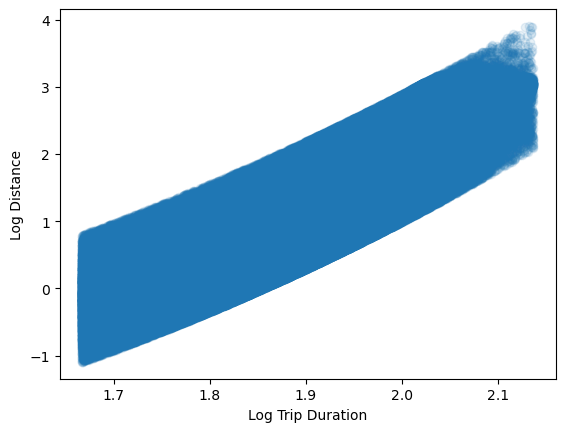

In [527]:
import numpy as np
import matplotlib.pyplot as plt

# Take the log of the trip duration and distance
log_trip_duration = np.log(df['trip_duration'])
log_distance = np.log(df['distance'])

# Create a scatter plot of log distance over log trip_duration
plt.scatter(log_trip_duration, df['distance'], alpha=0.1)
plt.xlabel('Log Trip Duration')
plt.ylabel('Log Distance')
plt.show()


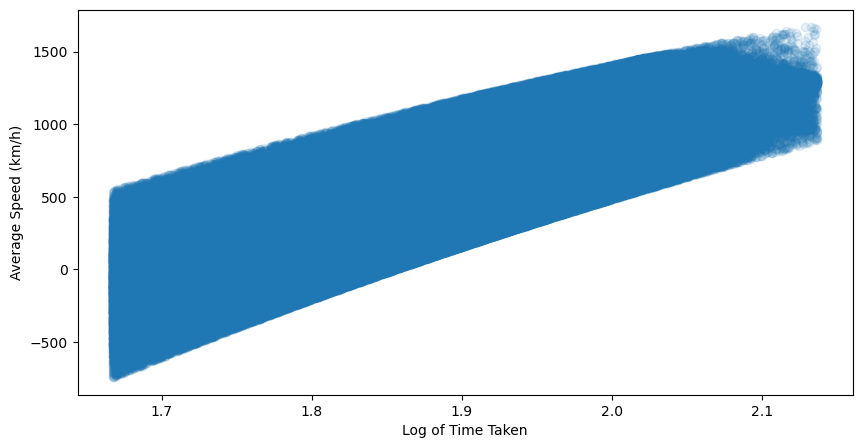

In [528]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the average speed for each trip
df['avg_speed'] = df['distance'] / (df['trip_duration'] / 3600)

# Take the log of the time taken
df['log_time_taken'] = np.log(df['trip_duration'])

# Create a scatter plot for average speed over log of time taken
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['log_time_taken'], df['avg_speed'], alpha=0.1)
ax.set_xlabel('Log of Time Taken')
ax.set_ylabel('Average Speed (km/h)')
plt.show()


C:\Users\Alexp\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


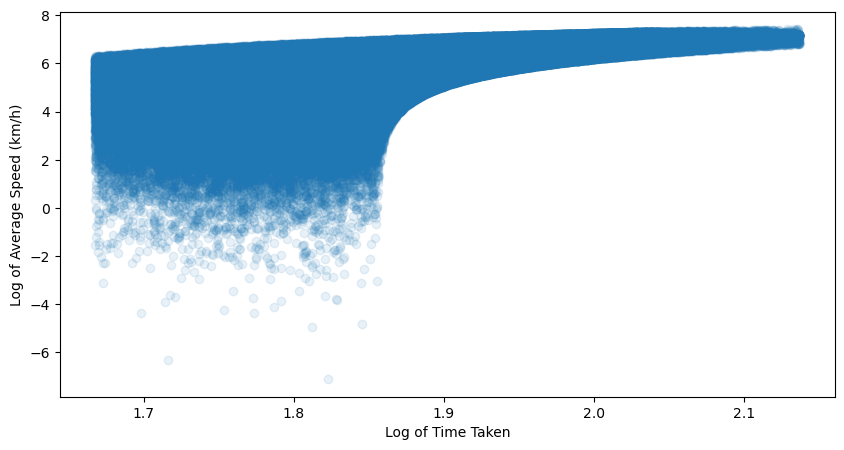

In [529]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the average speed for each trip
df['avg_speed'] = df['distance'] / (df['trip_duration'] / 3600)

# Take the log of the time taken and average speed
df['log_time_taken'] = np.log(df['trip_duration'])
df['log_avg_speed'] = np.log(df['avg_speed'])

# Create a scatter plot for log of average speed over log of time taken
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df['log_time_taken'], df['log_avg_speed'], alpha=0.1)
ax.set_xlabel('Log of Time Taken')
ax.set_ylabel('Log of Average Speed (km/h)')
plt.show()


In [ ]:
df = df[df['log_time_taken'] <= 8]

In [ ]:
df

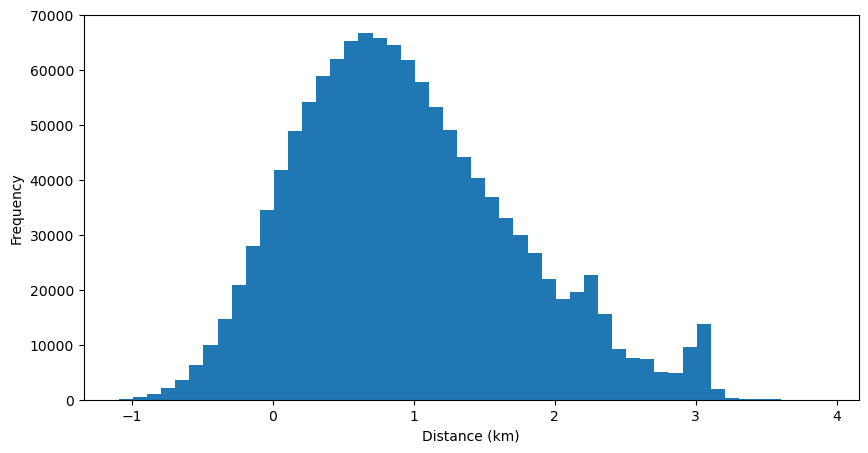

In [530]:
import matplotlib.pyplot as plt

# Create a bar chart for the distance feature
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(df['distance'], bins=50)
ax.set_xlabel('Distance (km)')
ax.set_ylabel('Frequency')
plt.show()


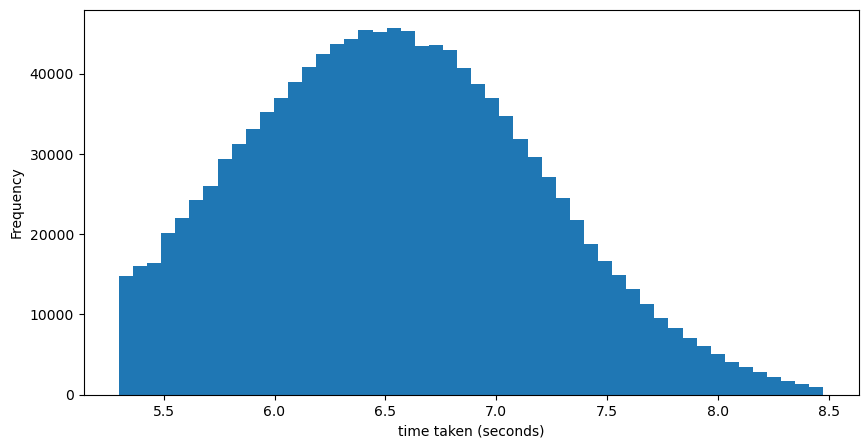

In [531]:
import matplotlib.pyplot as plt

# Create a bar chart for the distance feature
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(df['trip_duration'], bins=50)
ax.set_xlabel('time taken (seconds)')
ax.set_ylabel('Frequency')
plt.show()


Fold 1
MSE: 90067.46
R-squared: 0.77
Fold 2
MSE: 87682.65
R-squared: 0.78
Fold 3
MSE: 90327.81
R-squared: 0.78
Fold 4
MSE: 90051.23
R-squared: 0.77
Fold 5
MSE: 88547.55
R-squared: 0.78
Fold 6
MSE: 89384.54
R-squared: 0.77
Fold 7
MSE: 88573.64
R-squared: 0.78
Fold 8
MSE: 88497.81
R-squared: 0.77
Fold 9
MSE: 87574.12
R-squared: 0.77
Fold 10
MSE: 88773.88
R-squared: 0.77


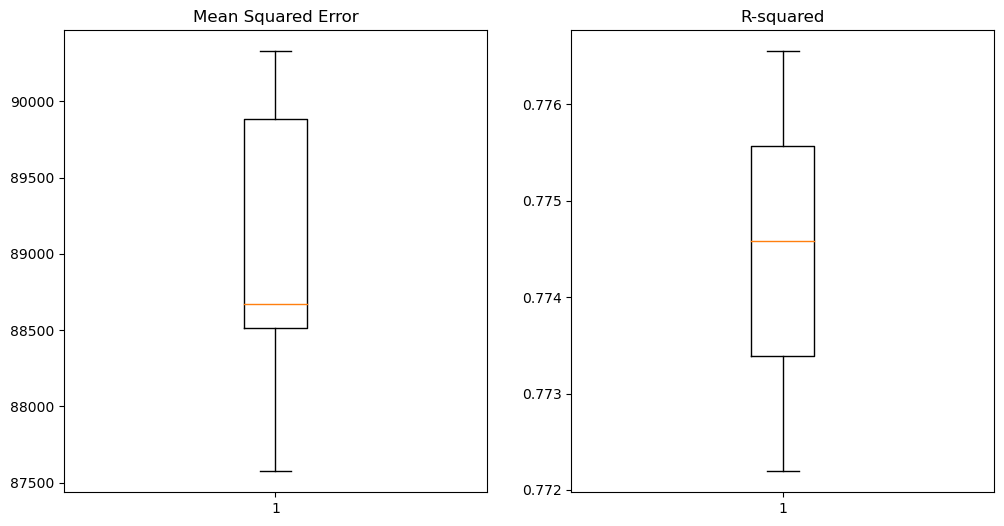

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

num_folds = 10

X = df.drop(['trip_duration'], axis=1)
y = df['trip_duration']
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
mse_scores = []
r2_scores = []
y_pred_list = []
y_test_list = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    print(f'Fold {fold + 1}')
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    rf = DecisionTreeRegressor(max_depth=10, random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'MSE: {mse:.2f}')
    print(f'R-squared: {r2:.2f}')
    mse_scores.append(mse)
    r2_scores.append(r2)
    y_pred_list.append(y_pred)
    y_test_list.append(y_test)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].boxplot(mse_scores)
axes[0].set_title('Mean Squared Error')
axes[1].boxplot(r2_scores)
axes[1].set_title('R-squared')
plt.show()


In [479]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(df.drop(['trip_duration'], axis=1), df['trip_duration'], test_size=0.3, random_state=42)
tree = DecisionTreeRegressor(max_depth=10, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Squared Error: 0.09366485206404565
R-squared score: 0.7728617024124562


In [480]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(df.drop(['trip_duration'], axis=1), df['trip_duration'], test_size=0.3, random_state=42)
ab = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5), n_estimators=100, learning_rate=0.1, random_state=42)
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Squared Error: 0.10186222575466765
R-squared score: 0.7529829809524184


In [481]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(df.drop(['trip_duration'], axis=1), df['trip_duration'], test_size=0.3, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


Mean Squared Error: 0.09243888460962599
R-squared score: 0.7758346869884016


In [482]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(df.drop(['trip_duration'], axis=1), df['trip_duration'], test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R2 score:', r2)
print('MSE:', mse)

R2 score: 0.7334185864182337
MSE: 0.10992998068296528


In [489]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score

from keras.metrics import MeanSquaredError, MeanAbsoluteError, RootMeanSquaredError, MeanAbsolutePercentageError

# Define the number of folds
k = 10

# Split the data into k folds
kf = KFold(n_splits=k, random_state=42, shuffle=True)

# Create lists to store the R2 scores and MSEs for each fold
r2_scores = []
mses = []
# Loop through each fold
for train_index, test_index in kf.split(df):
    # Split the data into training and testing sets for this fold
    X_train, X_test = df.iloc[train_index].drop(['trip_duration'], axis=1), df.iloc[test_index].drop(['trip_duration'], axis=1)
    y_train, y_test = df.iloc[train_index]['trip_duration'], df.iloc[test_index]['trip_duration']
    
    # Standardize the input features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Define the deep learning model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    # Train the model on the training set
    model.fit(X_train, y_train, epochs=4, batch_size=32)
    
    # Use the trained model to make predictions on the testing set
    y_pred = model.predict(X_test)
    
    # Calculate the R2 score and MSE for this fold
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Append the R2 score and MSE to the lists
    r2_scores.append(r2)
    mses.append(mse)

# Calculate the mean and standard deviation of the R2 scores and MSEs for all folds
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)
mean_mse = np.mean(mses)
std_mse = np.std(mses)

# Print the mean and standard deviation of the R2 scores and MSEs
print('Mean R2 score:', mean_r2)
print('Standard deviation of R2 scores:', std_r2)
print('Mean MSE:', mean_mse)
print('Standard deviation of MSEs:', std_mse)


Epoch 1/4
 3716/34897 [==>...........................] - ETA: 1:07 - loss: 0.6087

KeyboardInterrupt: 

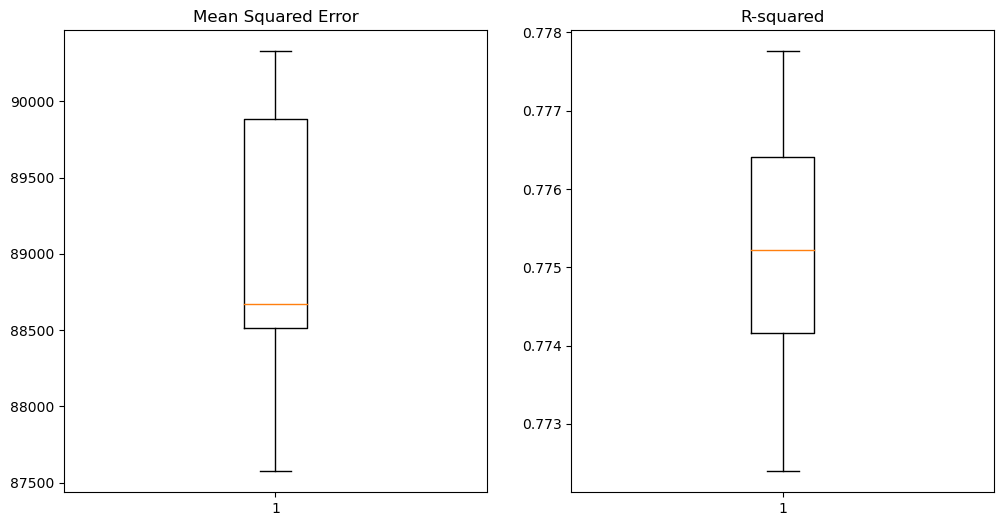

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].boxplot(mse_scores)
axes[0].set_title('Mean Squared Error')
axes[1].boxplot(r2_scores)
axes[1].set_title('R-squared')
plt.show()


In [466]:
df.shape

(1240758, 11)

In [468]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(10,), kernel_regularizer=L1L2(l1=0.01, l2=0.01)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=L1L2(l1=0.01, l2=0.01)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=L1L2(l1=0.01, l2=0.01)),
    Dropout(0.5),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with your data
# X_train: your 9 features
# y_train: trip_duration
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/5
12408/12408 [==============================] - 52s 4ms/step - loss: 1.7966 - val_loss: 0.3246
Epoch 2/5
12408/12408 [==============================] - 49s 4ms/step - loss: 0.3490 - val_loss: 0.2745
Epoch 3/5
12408/12408 [==============================] - 49s 4ms/step - loss: 0.3328 - val_loss: 0.2710
Epoch 4/5
12408/12408 [==============================] - 50s 4ms/step - loss: 0.3270 - val_loss: 0.2635
Epoch 5/5
12408/12408 [==============================] - 49s 4ms/step - loss: 0.3248 - val_loss: 0.2591


In [469]:
# Use the trained model to make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the R2 score and MSE for this fold
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(r2)
print(mse)

7755/7755 [==============================] - 14s 2ms/step
0.5273651788470468
0.19437256024490754


In [522]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='ann_model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [520]:
%pip install pydot

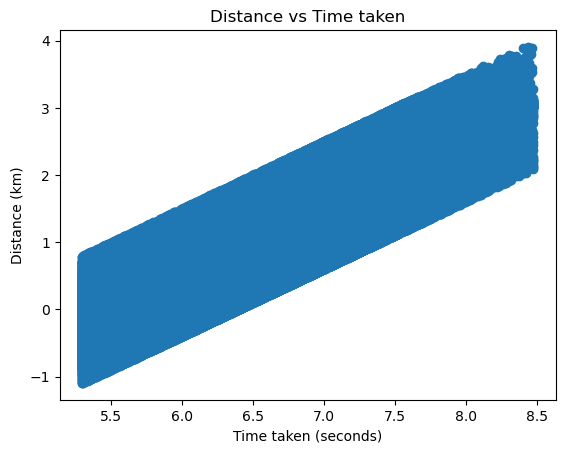

In [532]:
import matplotlib.pyplot as plt

plt.scatter(df["trip_duration"], df["distance"])
plt.xlabel("Time taken (seconds)")
plt.ylabel("Distance (km)")
plt.title("Distance vs Time taken")
plt.show()
